#%% [markdown]

 # Homography estimation of UFC logos

In [ ]:
#%%

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Add the necessary paths
sys.path.append(str(Path(__file__).parent))

# Import the required modules
from imcui.ui.utils import load_config, get_matcher_zoo, run_matching
from imcui.ui.viz import display_keypoints, display_matches
from typing import TypedDict, Optional

# Load images
image0 = cv2.imread("/home/sebastiangarcia/projects/swappr/data/legacy/dataset_specific_v2/train/images/converted_clip_14_frame_000000.jpg")
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)[0: 600, 900:, ...]

image1 = cv2.imread('/home/sebastiangarcia/projects/swappr/logo_id_data/digital/bud_light.png')
# image1 = cv2.imread('/home/sebastiangarcia/projects/swappr/logo_id_data/physical/black_rifle_coffe.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

print(f"Image 0 shape: {image0.shape}")
print(f"Image 1 shape: {image1.shape}")

Image 0 shape: (600, 1020, 3)
Image 1 shape: (653, 1154, 3)


#%% [markdown]

 ## Setup Configuration and Matcher Zoo

In [ ]:
#%%

# Load configuration
config_path = Path(__file__).parent / "config/config.yaml"
cfg = load_config(config_path)

# Get matcher zoo
matcher_zoo = get_matcher_zoo(cfg["matcher_zoo"])

print("Available matchers:")
for key in matcher_zoo.keys():
    print(f"  - {key}")

Available matchers:
  - matchanything_eloftr
  - matchanything_roma


#%% [markdown]

 ## Instantiate Match Anything ELoFTR

In [ ]:
#%%

# Parameters for ELoFTR
model_key = "matchanything_eloftr"
match_threshold = 0.01
extract_max_keypoints = 2000
keypoint_threshold = 0.05
ransac_method = "CV2_USAC_MAGSAC"
ransac_reproj_threshold = 8
ransac_confidence = 0.999
ransac_max_iter = 10000
choice_geometry_type = "Homography"

print(f"Running matching with {model_key}...")

Running matching with matchanything_eloftr...


In [ ]:
#%%

# Run matching
results_eloftr = run_matching(
    image0=image0,
    image1=image1,
    match_threshold=match_threshold,
    extract_max_keypoints=extract_max_keypoints,
    keypoint_threshold=keypoint_threshold,
    key=model_key,
    ransac_method=ransac_method,
    ransac_reproj_threshold=ransac_reproj_threshold,
    ransac_confidence=ransac_confidence,
    ransac_max_iter=ransac_max_iter,
    choice_geometry_type=choice_geometry_type,
    matcher_zoo=matcher_zoo,
    force_resize=False,
    image_width=640,
    image_height=480,
    use_cached_model=False,
)

# Extract results
(output_keypoints_eloftr, output_matches_raw_eloftr, output_matches_ransac_eloftr,
 num_matches_eloftr, configs_eloftr, geom_info_eloftr, output_wrapped_eloftr,
 state_cache_eloftr, output_pred_eloftr) = results_eloftr

print(f"ELoFTR Results:")
print(f"  - Raw matches: {num_matches_eloftr['num_raw_matches']}")
print(f"  - RANSAC matches: {num_matches_eloftr['num_ransac_matches']}")

xFormers not available
xFormers not available
2025-07-10 17:19:50.291 | INFO     | src.loftr.loftr_module.transformer:__init__:1441 - npe trainH,trainW,testH,testW: 832, 832, 832, 832


RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05,

2025-07-10 17:19:50.595 | INFO     | MatchAnything.src.lightning.lightning_loftr:__init__:76 - Load model from:<All keys matched successfully>
[2025/07/10 17:19:52 hloc INFO] Loading matchanything_eloftr model done
[2025/07/10 17:19:52 hloc INFO] Loading model using: 3.520s
[2025/07/10 17:19:52 hloc INFO] preprocessing is already resized
[2025/07/10 17:19:55 hloc INFO] Matching images done using: 3.410s
[2025/07/10 17:19:56 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Fundamental
[2025/07/10 17:19:56 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography
[2025/07/10 17:19:56 hloc INFO] RANSAC matches done using: 1.301s
[2025/07/10 17:19:57 hloc INFO] Display matches done using: 0.852s
[2025/07/10 17:19:57 hloc INFO] TOTAL time: 9.196s
[2025/07/10 17:19:57 hloc INFO] Dump results done!


ELoFTR Results:
  - Raw matches: 4130
  - RANSAC matches: 1096


#%% [markdown]

 ## Display ELoFTR Results

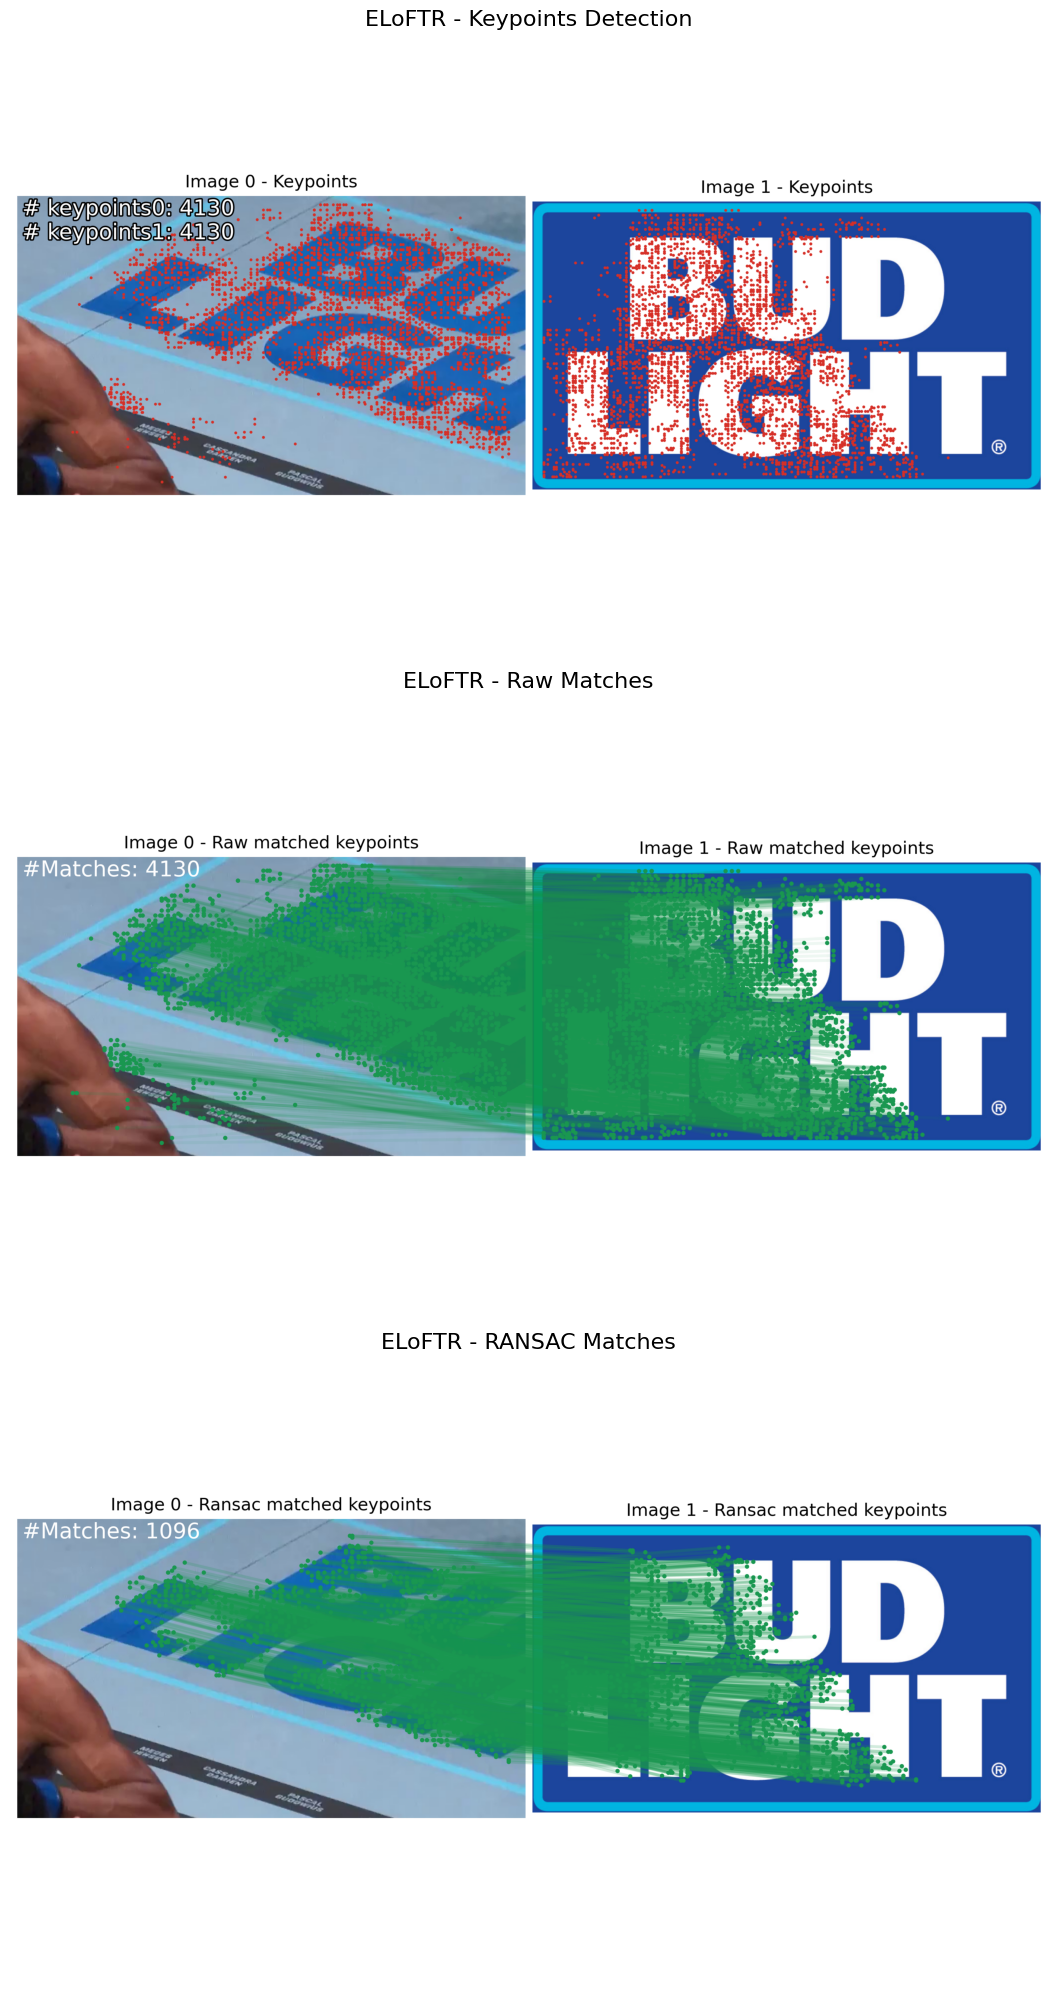

In [ ]:
#%%

# Display the three plots for ELoFTR
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot 1: Keypoints
axes[0].imshow(output_keypoints_eloftr)
axes[0].set_title("ELoFTR - Keypoints Detection", fontsize=16)
axes[0].axis('off')

# Plot 2: Raw Matches
axes[1].imshow(output_matches_raw_eloftr)
axes[1].set_title("ELoFTR - Raw Matches", fontsize=16)
axes[1].axis('off')

# Plot 3: RANSAC Matches
axes[2].imshow(output_matches_ransac_eloftr)
axes[2].set_title("ELoFTR - RANSAC Matches", fontsize=16)
axes[2].axis('off')

plt.tight_layout()
plt.show()

#%% [markdown]

 ## Instantiate Match Anything ROMA

In [ ]:
#%%

# Parameters for ROMA
model_key = "matchanything_roma"
match_threshold = 0.01
extract_max_keypoints = 2000
keypoint_threshold = 0.05
ransac_method = "CV2_USAC_MAGSAC"
ransac_reproj_threshold = 8
ransac_confidence = 0.999
ransac_max_iter = 10000
choice_geometry_type = "Homography"

print(f"Running matching with {model_key}...")

Running matching with matchanything_roma...


In [ ]:
#%%

# Run matching
results_roma = run_matching(
    image0=image0,
    image1=image1,
    match_threshold=match_threshold,
    extract_max_keypoints=extract_max_keypoints,
    keypoint_threshold=keypoint_threshold,
    key=model_key,
    ransac_method=ransac_method,
    ransac_reproj_threshold=ransac_reproj_threshold,
    ransac_confidence=ransac_confidence,
    ransac_max_iter=ransac_max_iter,
    choice_geometry_type=choice_geometry_type,
    matcher_zoo=matcher_zoo,
    force_resize=False,
    image_width=640,
    image_height=480,
    use_cached_model=False,
)

# Extract results
(output_keypoints_roma, output_matches_raw_roma, output_matches_ransac_roma,
 num_matches_roma, configs_roma, geom_info_roma, output_wrapped_roma,
 state_cache_roma, output_pred_roma) = results_roma

print(f"ROMA Results:")
print(f"  - Raw matches: {num_matches_roma['num_raw_matches']}")
print(f"  - RANSAC matches: {num_matches_roma['num_ransac_matches']}")

*****************cuda, False**************************


2025-07-10 17:20:11.904 | INFO     | MatchAnything.src.lightning.lightning_loftr:__init__:76 - Load model from:<All keys matched successfully>
[2025/07/10 17:20:12 hloc INFO] Loading matchanything_roma model done
[2025/07/10 17:20:12 hloc INFO] Loading model using: 7.382s
[2025/07/10 17:20:12 hloc INFO] preprocessing is already resized
[2025/07/10 17:20:14 hloc INFO] Matching images done using: 2.610s
[2025/07/10 17:20:16 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Fundamental
[2025/07/10 17:20:16 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography
[2025/07/10 17:20:16 hloc INFO] RANSAC matches done using: 1.766s
[2025/07/10 17:20:20 hloc INFO] Display matches done using: 3.487s
[2025/07/10 17:20:20 hloc INFO] TOTAL time: 15.373s
[2025/07/10 17:20:20 hloc INFO] Dump results done!


ROMA Results:
  - Raw matches: 4968
  - RANSAC matches: 4646


#%% [markdown]

 ## Compare Results

In [ ]:
#%%

# Compare the results between ELoFTR and ROMA
comparison_data = {
    'Model': ['ELoFTR', 'ROMA'],
    'Raw Matches': [num_matches_eloftr['num_raw_matches'], num_matches_roma['num_raw_matches']],
    'RANSAC Matches': [num_matches_eloftr['num_ransac_matches'], num_matches_roma['num_ransac_matches']]
}

import pandas as pd
df = pd.DataFrame(comparison_data)
print("\nComparison Results:")
print(df.to_string(index=False))


Comparison Results:
 Model  Raw Matches  RANSAC Matches
ELoFTR         4130            1096
  ROMA         4968            4646


#%% [markdown]

 ## Display Warped Images

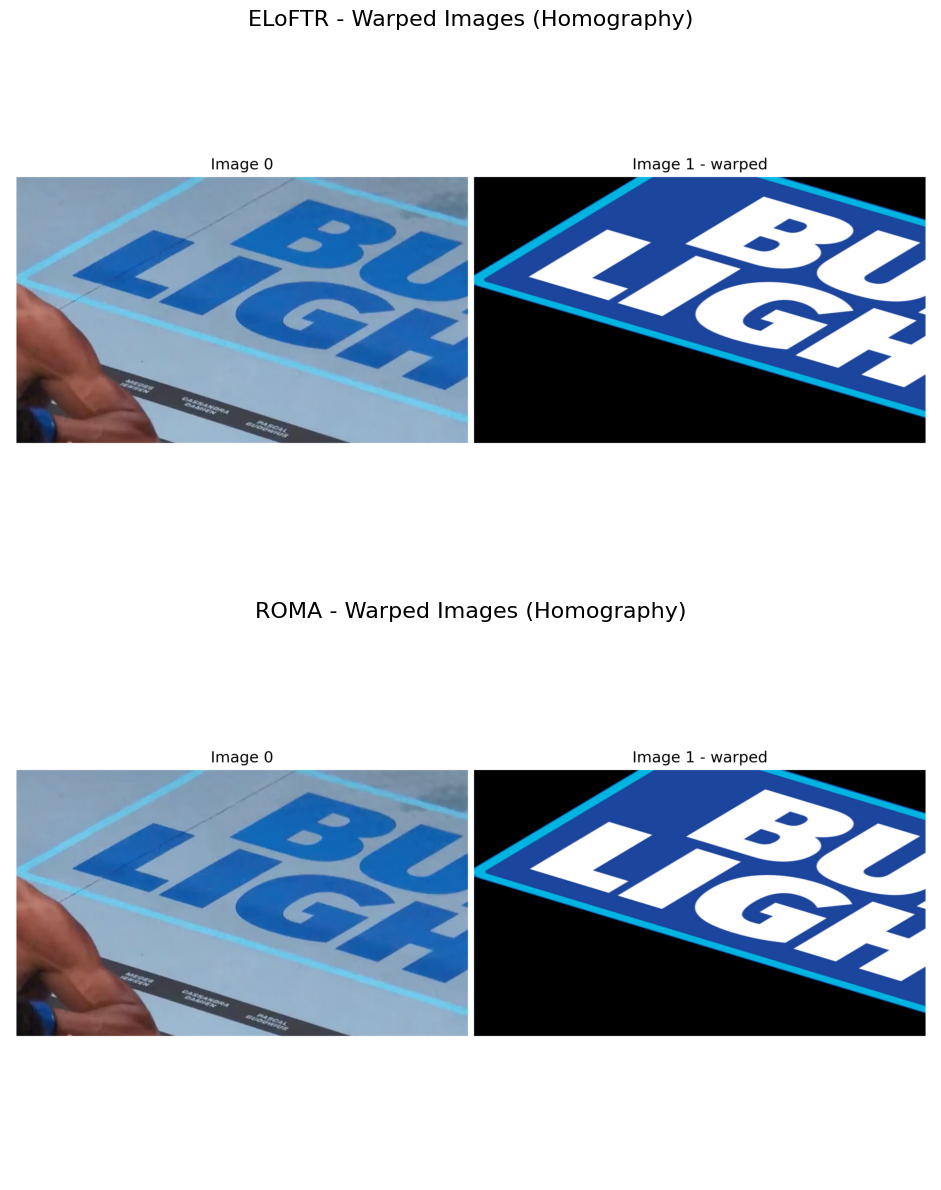


Homography estimation completed!
The warped images show how well the second image (Bud Light logo) can be
aligned with the first image (UFC frame) using the estimated homography matrix.


In [ ]:
#%%

# Display the warped images for both models
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# ELoFTR warped result
if output_wrapped_eloftr is not None:
    axes[0].imshow(output_wrapped_eloftr)
    axes[0].set_title("ELoFTR - Warped Images (Homography)", fontsize=16)
    axes[0].axis('off')
else:
    axes[0].text(0.5, 0.5, "ELoFTR - No warped image available",
                ha='center', va='center', transform=axes[0].transAxes, fontsize=14)
    axes[0].axis('off')

# ROMA warped result
if output_wrapped_roma is not None:
    axes[1].imshow(output_wrapped_roma)
    axes[1].set_title("ROMA - Warped Images (Homography)", fontsize=16)
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, "ROMA - No warped image available",
                ha='center', va='center', transform=axes[1].transAxes, fontsize=14)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\nHomography estimation completed!")
print("The warped images show how well the second image (Bud Light logo) can be")
print("aligned with the first image (UFC frame) using the estimated homography matrix.")

#%% [markdown]

 # Simplifying model inference

In [ ]:
#%%

# TODO:
import numpy as np
import time
import torch
from typing import TypedDict, Optional
from imcui.hloc.matchers.matchanything import MatchAnything
from imcui.hloc import match_dense
from imcui.ui.utils import (
    get_model, proc_ransac_matches, set_null_pred,
    DEFAULT_MIN_NUM_MATCHES, ransac_zoo, DEFAULT_RANSAC_METHOD
)


# Raw match prediction
class MatchPrediction(TypedDict):
    # Matched points before filtering with RANSAC
    # the points x,y coordinate must match with the shape of the
    # input images ("mkeypoints0_orig", "mkeypoints1_orig")
    mkpts0: np.ndarray # matched points in image0 as Nx2 numpy array.
    mkpts1: np.ndarray # matched points in image1 as Nx2 numpy array.
    # Additional required keys for RANSAC filtering
    mkeypoints0_orig: np.ndarray  # matched points in original image0 coordinates
    mkeypoints1_orig: np.ndarray  # matched points in original image1 coordinates
    mconf: np.ndarray  # confidence scores for matches
    image0_orig: np.ndarray  # original image0
    image1_orig: np.ndarray  # original image1

class FilteredMatchPrediction(MatchPrediction):
    # Homography matrix estimated after RANSAC filtering
    H: np.ndarray
    # Matched points after filtering with RANSAC
    # the points x,y coordinate must match with the shape of the
    # input images ("mkeypoints0_orig", "mkeypoints1_orig")
    mmkpts0: np.ndarray # matched points in image0 as Nx2 numpy array.
    mmkpts1: np.ndarray # matched points in image1 as Nx2 numpy array.
    mmkeypoints0_orig: np.ndarray  # RANSAC filtered matches in original image0 coordinates
    mmkeypoints1_orig: np.ndarray  # RANSAC filtered matches in original image1 coordinates
    mmconf: np.ndarray  # confidence scores for RANSAC filtered matches


def load_matchanything_model(
    model_name: str = "matchanything_eloftr",
    match_threshold: float = 0.01,
    extract_max_keypoints: int = 2000,
    log_timing: bool = False
) -> tuple[MatchAnything, dict]:
    """
    Load and return a ready-to-use MatchAnything model instance with its preprocessing config.

    Args:
        model_name: Either "matchanything_eloftr" or "matchanything_roma"
        match_threshold: Matching threshold for the model
        extract_max_keypoints: Maximum number of keypoints to extract
        log_timing: Whether to log loading time

    Returns:
        Tuple of (loaded MatchAnything model instance, preprocessing configuration)
    """
    if log_timing:
        t0 = time.time()

    # Load configuration and matcher zoo
    config_path = Path(__file__).parent / "config/config.yaml"
    cfg = load_config(config_path)
    matcher_zoo = get_matcher_zoo(cfg["matcher_zoo"])

    # Get model configuration
    model_config = matcher_zoo[model_name]
    match_conf = model_config["matcher"]

    # Update model configuration
    match_conf["model"]["match_threshold"] = match_threshold
    match_conf["model"]["max_keypoints"] = extract_max_keypoints

    # Load the model
    model = get_model(match_conf)

    # Get the original preprocessing configuration (which has the correct force_resize setting)
    preprocessing_conf = match_conf["preprocessing"].copy()

    if log_timing:
        print(f"Model {model_name} loaded in {time.time() - t0:.3f}s")
        print(f"Using preprocessing config: {preprocessing_conf}")

    return model, preprocessing_conf


def run_matching_simple(
    model: MatchAnything,
    img0_frame_logo: np.ndarray,
    img1_ref_logo: np.ndarray,
    preprocessing_conf: Optional[dict] = None,
    match_threshold: float = 0.01,
    extract_max_keypoints: int = 2000,
    keypoint_threshold: float = 0.05,
    log_timing: bool = False
) -> MatchPrediction:
    """
    Runs MatchAnything model to estimate matches between
    a logo that appears with an arbitrary viewpoint from the frame
    of a UFC fight and the same logo observed from the bird's eye
    view of the octagon.

    The matches that this function outputs will be used to estimate
    a homography matrix for logo replacement.

    Parameters:
        model: MatchAnything: instantiated ROMA or ELoFTR model.
        img0_frame_logo: is the cropped logo that was cropped in a frame during the fight,
        img1_ref_logo: is the image of the logo taken from a top view before the UFC fight began
        preprocessing_conf: preprocessing configuration from load_matchanything_model
        match_threshold: matching threshold for the model
        extract_max_keypoints: maximum number of keypoints to extract
        keypoint_threshold: keypoint detection threshold
        log_timing: whether to log inference time

    Returns:
        MatchPrediction with matched keypoints and metadata
    """
    if log_timing:
        t0 = time.time()

    # Use the original preprocessing configuration or create a default one
    if preprocessing_conf is None:
        preprocessing_conf = {
            "grayscale": False,
            "resize_max": 832,
            "dfactor": 32,
            "width": 640,
            "height": 480,
            "force_resize": True,  # Use True by default to match original config
        }

    # Update model thresholds
    model.conf["match_threshold"] = match_threshold
    model.conf["max_keypoints"] = extract_max_keypoints

    # Run inference using the same pipeline as the original code
    with torch.no_grad():
        pred = match_dense.match_images(
            model, img0_frame_logo, img1_ref_logo, preprocessing_conf, device="cuda" if torch.cuda.is_available() else "cpu"
        )

    # Extract the required information for MatchPrediction
    result = MatchPrediction(
        mkpts0=pred["mkeypoints0_orig"],
        mkpts1=pred["mkeypoints1_orig"],
        mkeypoints0_orig=pred["mkeypoints0_orig"],
        mkeypoints1_orig=pred["mkeypoints1_orig"],
        mconf=pred["mconf"],
        image0_orig=pred["image0_orig"],
        image1_orig=pred["image1_orig"]
    )

    if log_timing:
        print(f"Matching inference completed in {time.time() - t0:.3f}s")

    return result


def filter_matches_ransac(
    prediction: MatchPrediction,
    ransac_method: str = "CV2_USAC_MAGSAC",
    ransac_reproj_threshold: float = 8.0,
    ransac_confidence: float = 0.999,
    ransac_max_iter: int = 10000,
    log_timing: bool = False
) -> FilteredMatchPrediction:
    """
    Filter matches using RANSAC and estimate Homography matrix.

    Args:
        prediction: MatchPrediction from run_matching_simple
        ransac_method: RANSAC method to use
        ransac_reproj_threshold: RANSAC reprojection threshold
        ransac_confidence: RANSAC confidence level
        ransac_max_iter: RANSAC maximum iterations
        log_timing: whether to log processing time

    Returns:
        FilteredMatchPrediction with RANSAC-filtered matches and homography matrix
    """
    if log_timing:
        t0 = time.time()

    mkpts0 = prediction["mkeypoints0_orig"]
    mkpts1 = prediction["mkeypoints1_orig"]
    mconf = prediction["mconf"]

    # Check if we have enough matches
    if len(mkpts0) < DEFAULT_MIN_NUM_MATCHES:
        if log_timing:
            print(f"Not enough matches ({len(mkpts0)} < {DEFAULT_MIN_NUM_MATCHES}), returning empty result")

        return FilteredMatchPrediction(
            **prediction,  # Keep original data
            H=np.array([]),
            mmkpts0=np.array([]).reshape(0, 2),
            mmkpts1=np.array([]).reshape(0, 2),
            mmkeypoints0_orig=np.array([]).reshape(0, 2),
            mmkeypoints1_orig=np.array([]).reshape(0, 2),
            mmconf=np.array([])
        )

    # Validate ransac method
    if ransac_method not in ransac_zoo.keys():
        ransac_method = DEFAULT_RANSAC_METHOD

    try:
        # Compute Homography using RANSAC
        H, mask_h = proc_ransac_matches(
            mkpts1,  # Note: swapped order as in original code
            mkpts0,
            ransac_method,
            ransac_reproj_threshold,
            ransac_confidence,
            ransac_max_iter,
            geometry_type="Homography",
        )

        if H is not None and mask_h is not None:
            # Filter matches using the RANSAC mask
            filtered_mkpts0 = mkpts0[mask_h]
            filtered_mkpts1 = mkpts1[mask_h]
            filtered_mconf = mconf[mask_h]

            result = FilteredMatchPrediction(
                **prediction,  # Keep original data
                H=H,
                mmkpts0=filtered_mkpts0,
                mmkpts1=filtered_mkpts1,
                mmkeypoints0_orig=filtered_mkpts0,
                mmkeypoints1_orig=filtered_mkpts1,
                mmconf=filtered_mconf
            )
        else:
            # RANSAC failed, return empty filtered results
            result = FilteredMatchPrediction(
                **prediction,  # Keep original data
                H=np.array([]),
                mmkpts0=np.array([]).reshape(0, 2),
                mmkpts1=np.array([]).reshape(0, 2),
                mmkeypoints0_orig=np.array([]).reshape(0, 2),
                mmkeypoints1_orig=np.array([]).reshape(0, 2),
                mmconf=np.array([])
            )

    except Exception as e:
        print(f"RANSAC failed with error: {e}")
        # Return empty filtered results on any error
        result = FilteredMatchPrediction(
            **prediction,  # Keep original data
            H=np.array([]),
            mmkpts0=np.array([]).reshape(0, 2),
            mmkpts1=np.array([]).reshape(0, 2),
            mmkeypoints0_orig=np.array([]).reshape(0, 2),
            mmkeypoints1_orig=np.array([]).reshape(0, 2),
            mmconf=np.array([])
        )

    if log_timing:
        num_filtered = len(result["mmkpts0"]) if len(result["H"]) > 0 else 0
        print(f"RANSAC filtering completed in {time.time() - t0:.3f}s")
        print(f"Filtered {len(mkpts0)} → {num_filtered} matches")

    return result


def warp_images_simple(
    filtered_prediction: FilteredMatchPrediction,
    log_timing: bool = False
) -> tuple[Optional[np.ndarray], Optional[np.ndarray]]:
    """
    Warp images using the estimated homography matrix, replicating wrap_images functionality.

    Args:
        filtered_prediction: FilteredMatchPrediction from filter_matches_ransac
        geom_type: Type of geometry ("Homography" or "Fundamental")
        log_timing: Whether to log processing time

    Returns:
        Tuple of (visualization image, warped image1) or (None, None) if failed
    """
    if log_timing:
        t0 = time.time()

    # Check if we have a valid homography matrix
    if len(filtered_prediction["H"]) == 0:
        if log_timing:
            print("No homography matrix available, cannot warp images")
        return None, None

    img0 = filtered_prediction["image0_orig"]
    img1 = filtered_prediction["image1_orig"]
    H = filtered_prediction["H"]

    h0, w0, _ = img0.shape
    h1, w1, _ = img1.shape

    try:
        # Warp img1 to img0's perspective using the homography matrix
        rectified_image1 = cv2.warpPerspective(img1, H, (w0, h0))

        # Create side-by-side visualization like the original
        # Concatenate images horizontally for comparison
        combined_img = np.concatenate([img0, rectified_image1], axis=1)

        if log_timing:
            print(f"Image warping completed in {time.time() - t0:.3f}s")

        return combined_img, rectified_image1

    except Exception as e:
        print(f"Image warping failed with error: {e}")
        return None, None

#%% [markdown]

 ## Test the simplified pipeline

In [ ]:
#%%

# Load models once (this should be done at startup)
print("Loading MatchAnything models...")

eloftr_model, eloftr_preprocessing_conf = load_matchanything_model("matchanything_eloftr", log_timing=True)
roma_model, roma_preprocessing_conf = load_matchanything_model("matchanything_roma", log_timing=True)

print("Models loaded successfully!")

2025-07-10 17:20:31.802 | INFO     | src.loftr.loftr_module.transformer:__init__:1441 - npe trainH,trainW,testH,testW: 832, 832, 832, 832


Loading MatchAnything models...
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  None
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identity =  BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
RepVGG Block, identit

2025-07-10 17:20:32.024 | INFO     | MatchAnything.src.lightning.lightning_loftr:__init__:76 - Load model from:<All keys matched successfully>
[2025/07/10 17:20:32 hloc INFO] Loading matchanything_eloftr model done


Model matchanything_eloftr loaded in 0.391s
Using preprocessing config: {'grayscale': False, 'resize_max': 832, 'dfactor': 32, 'width': 640, 'height': 480, 'force_resize': True}
*****************cuda, False**************************


2025-07-10 17:20:49.045 | INFO     | MatchAnything.src.lightning.lightning_loftr:__init__:76 - Load model from:<All keys matched successfully>
[2025/07/10 17:20:49 hloc INFO] Loading matchanything_roma model done


Model matchanything_roma loaded in 17.089s
Using preprocessing config: {'grayscale': False, 'resize_max': 832, 'dfactor': 32, 'width': 640, 'height': 480, 'force_resize': True}
Models loaded successfully!



=== Testing ELoFTR Simplified Pipeline ===


[2025/07/10 17:20:58 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography


Matching inference completed in 0.255s
ELoFTR raw matches: 4130
RANSAC filtering completed in 0.008s
Filtered 4130 → 1096 matches
ELoFTR filtered matches: 1096
Homography matrix shape: (3, 3)
Image warping completed in 0.003s


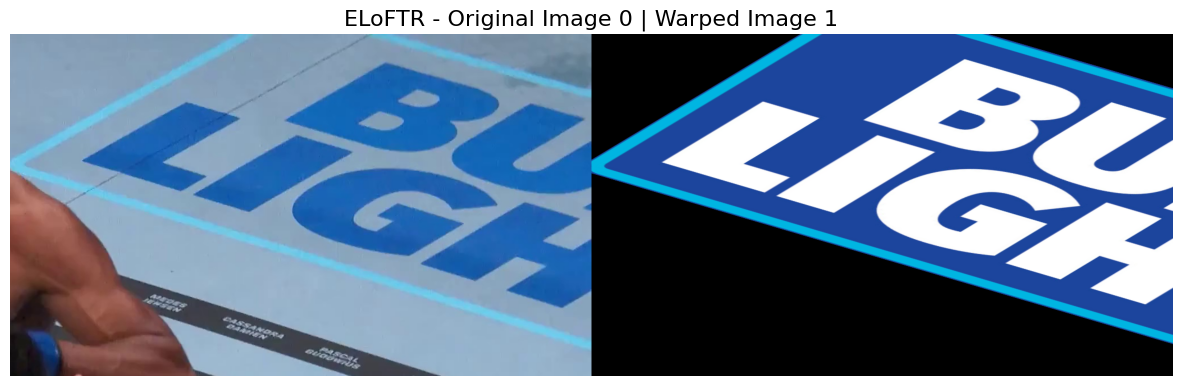

ELoFTR warping successful!


In [ ]:
#%%

# Test with ELoFTR
print("\n=== Testing ELoFTR Simplified Pipeline ===")

# Run matching with the original preprocessing configuration
eloftr_prediction = run_matching_simple(
    eloftr_model,
    image0,  # UFC frame
    image1,  # Bud Light logo
    preprocessing_conf=eloftr_preprocessing_conf,  # Use the original config!
    log_timing=True
)

print(f"ELoFTR raw matches: {len(eloftr_prediction['mkpts0'])}")

# Filter with RANSAC
eloftr_filtered = filter_matches_ransac(
    eloftr_prediction,
    log_timing=True
)

print(f"ELoFTR filtered matches: {len(eloftr_filtered['mmkpts0'])}")
if len(eloftr_filtered['H']) > 0:
    print(f"Homography matrix shape: {eloftr_filtered['H'].shape}")

    # Warp images for visual verification
    eloftr_warped_viz, eloftr_warped_img = warp_images_simple(
        eloftr_filtered,
        log_timing=True
    )

    if eloftr_warped_viz is not None:
        plt.figure(figsize=(15, 8))
        plt.imshow(eloftr_warped_viz)
        plt.title("ELoFTR - Original Image 0 | Warped Image 1", fontsize=16)
        plt.axis('off')
        plt.show()
        print("ELoFTR warping successful!")
    else:
        print("ELoFTR warping failed")


=== Testing ROMA Simplified Pipeline ===


[2025/07/10 17:21:00 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography


Matching inference completed in 1.400s
ROMA raw matches: 4969
RANSAC filtering completed in 0.004s
Filtered 4969 → 4645 matches
ROMA filtered matches: 4645
Homography matrix shape: (3, 3)
Image warping completed in 0.002s


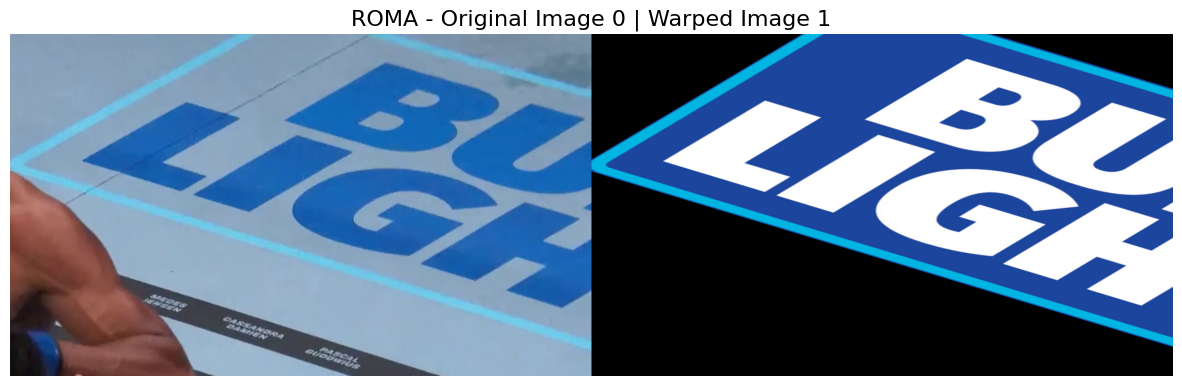

ROMA warping successful!


In [ ]:
#%%

# Test with ROMA
print("\n=== Testing ROMA Simplified Pipeline ===")

# Run matching with the original preprocessing configuration
roma_prediction = run_matching_simple(
    roma_model,
    image0,  # UFC frame
    image1,  # Bud Light logo
    preprocessing_conf=roma_preprocessing_conf,  # Use the original config!
    log_timing=True
)

print(f"ROMA raw matches: {len(roma_prediction['mkpts0'])}")

# Filter with RANSAC
roma_filtered = filter_matches_ransac(
    roma_prediction,
    log_timing=True
)

print(f"ROMA filtered matches: {len(roma_filtered['mmkpts0'])}")
if len(roma_filtered['H']) > 0:
    print(f"Homography matrix shape: {roma_filtered['H'].shape}")

    # Warp images for visual verification
    roma_warped_viz, roma_warped_img = warp_images_simple(
        roma_filtered,
        log_timing=True
    )

    if roma_warped_viz is not None:
        plt.figure(figsize=(15, 8))
        plt.imshow(roma_warped_viz)
        plt.title("ROMA - Original Image 0 | Warped Image 1", fontsize=16)
        plt.axis('off')
        plt.show()
        print("ROMA warping successful!")
    else:
        print("ROMA warping failed")

#%% [markdown]

 ## Performing swapping


0: 640x640 1 logo_budlight, 3.7ms
Speed: 7.5ms preprocess, 3.7ms inference, 13.4ms postprocess per image at shape (1, 3, 640, 640)


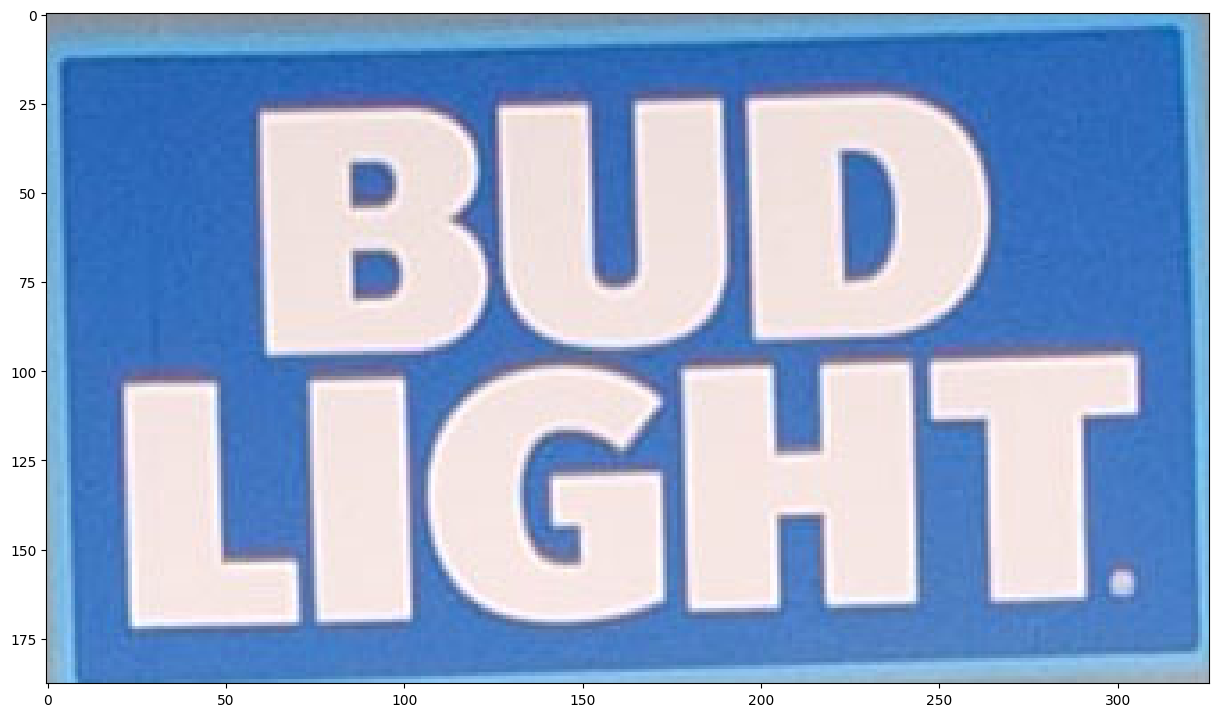

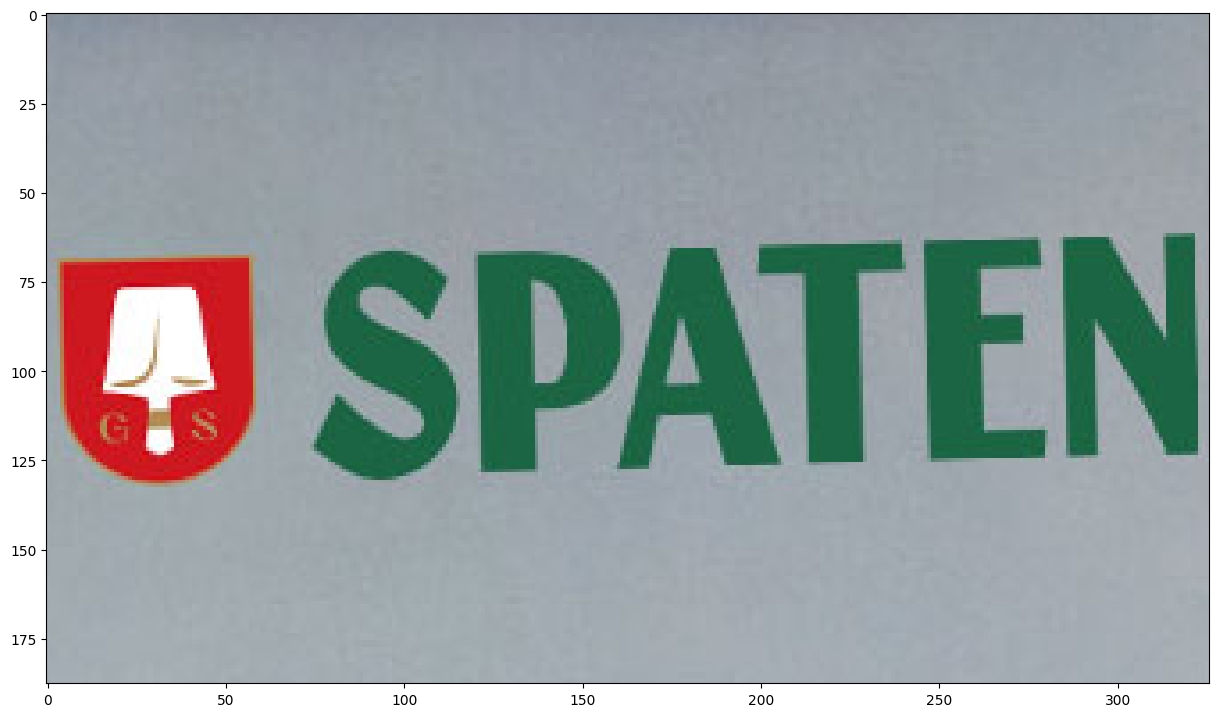

In [ ]:
#%%

from ultralytics import YOLO

det_model_budlight = YOLO("/home/sebastiangarcia/projects/swappr/models/poc/v2_budlight_logo_detection/weights/best.pt")

video_frame0_path = "/home/sebastiangarcia/projects/swappr/ufc317/02:02:31-02:02:34/images/440793.png"
budligth_top_view_path = "/home/sebastiangarcia/projects/swappr/data/poc/UFC317/top_view_budlight.jpg"
spaten_top_view_path = "/home/sebastiangarcia/projects/swappr/data/poc/UFC317/top_view_spaten.JPG"


budlight_top_view = cv2.imread(budligth_top_view_path)
results = det_model_budlight(budlight_top_view)
budlight_bbox = results[0].boxes.xyxy.cpu().numpy().astype("int").squeeze()
x1, y1, x2, y2  = budlight_bbox

# image1 = cv2.imread('/home/sebastiangarcia/projects/swappr/logo_id_data/physical/black_rifle_coffe.jpg')
budligth_top_view = cv2.cvtColor(budlight_top_view, cv2.COLOR_BGR2RGB)
budlight_logo_top_view = budligth_top_view[y1: y2, x1: x2, ...]

spaten_top_view = cv2.cvtColor(cv2.imread(spaten_top_view_path), cv2.COLOR_BGR2RGB)
spaten_logo_top_view = spaten_top_view[y1: y2, x1: x2, ...]

plt.figure(figsize=(15, 15))
plt.imshow(budlight_logo_top_view)
plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(spaten_logo_top_view)
plt.show()


0: 384x640 1 logo_budlight, 36.7ms
Speed: 1.4ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


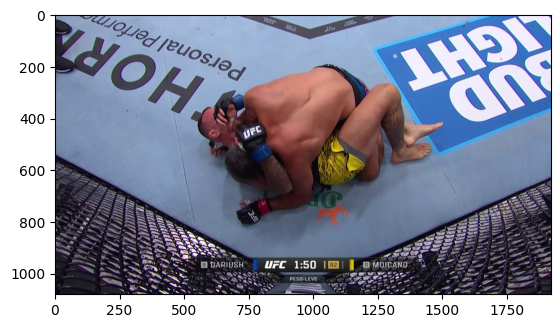

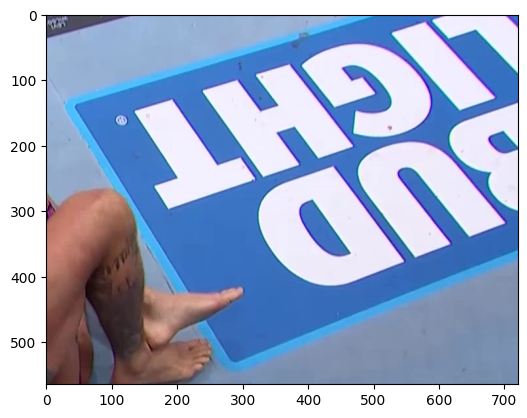

In [ ]:
# %%

def expand_box(bbox: np.ndarray, expansion_factor: float, img_width: Optional[int] = None, img_height: Optional[int] = None) -> tuple[int, int, int, int]:
    """
    Expand a bounding box by a given percentage.

    Args:
        bbox: Bounding box as [x1, y1, x2, y2] numpy array
        expansion_factor: Factor to expand the box by (e.g., 0.1 for 10% expansion)
        img_width: Maximum width to clamp the box to (optional)
        img_height: Maximum height to clamp the box to (optional)

    Returns:
        Tuple of (x1, y1, x2, y2) expanded coordinates
    """
    x1, y1, x2, y2 = bbox

    # Calculate current width and height
    width = x2 - x1
    height = y2 - y1

    # Calculate expansion amounts
    expand_w = int(width * expansion_factor / 2)  # Divide by 2 since we expand both sides
    expand_h = int(height * expansion_factor / 2)

    # Expand the box
    new_x1 = x1 - expand_w
    new_y1 = y1 - expand_h
    new_x2 = x2 + expand_w
    new_y2 = y2 + expand_h

    # Clamp to image boundaries if provided
    if img_width is not None:
        new_x1 = max(0, new_x1)
        new_x2 = min(img_width, new_x2)

    if img_height is not None:
        new_y1 = max(0, new_y1)
        new_y2 = min(img_height, new_y2)

    return new_x1, new_y1, new_x2, new_y2

video_frame0 = cv2.imread(video_frame0_path)
results = det_model_budlight(video_frame0)
budlight_bbox = results[0].boxes.xyxy.cpu().numpy().astype("int").squeeze()
img_height, img_width = video_frame0.shape[:2]
x1, y1, x2, y2 = expand_box(budlight_bbox, 0.1, img_width, img_height)

video_frame0 = cv2.cvtColor(video_frame0, cv2.COLOR_BGR2RGB)
budlight_video_frame_cropped = video_frame0[y1: y2, x1: x2, ...]

plt.imshow(video_frame0)
plt.show()

plt.imshow(budlight_video_frame_cropped)
plt.show()

In [ ]:
# %%

match_pred = run_matching_simple(
    roma_model,
    budlight_video_frame_cropped,  # UFC frame
    budlight_logo_top_view,  # Bud Light logo
    preprocessing_conf=eloftr_preprocessing_conf,  # Use the original config!
    log_timing=True
)

match_filtered = filter_matches_ransac(
    match_pred,
    log_timing=True
)

[2025/07/10 17:21:09 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography


Matching inference completed in 1.228s
RANSAC filtering completed in 0.004s
Filtered 4965 → 2264 matches


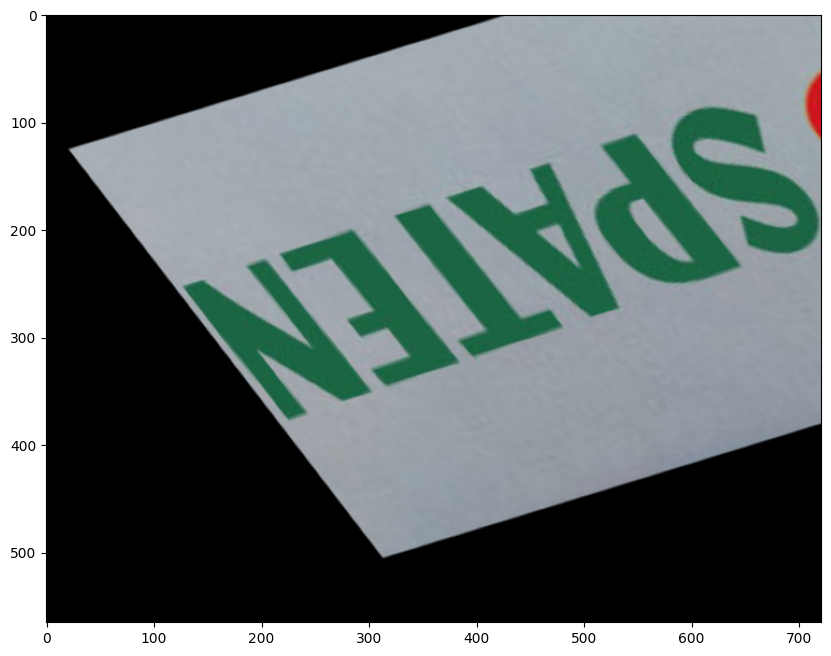

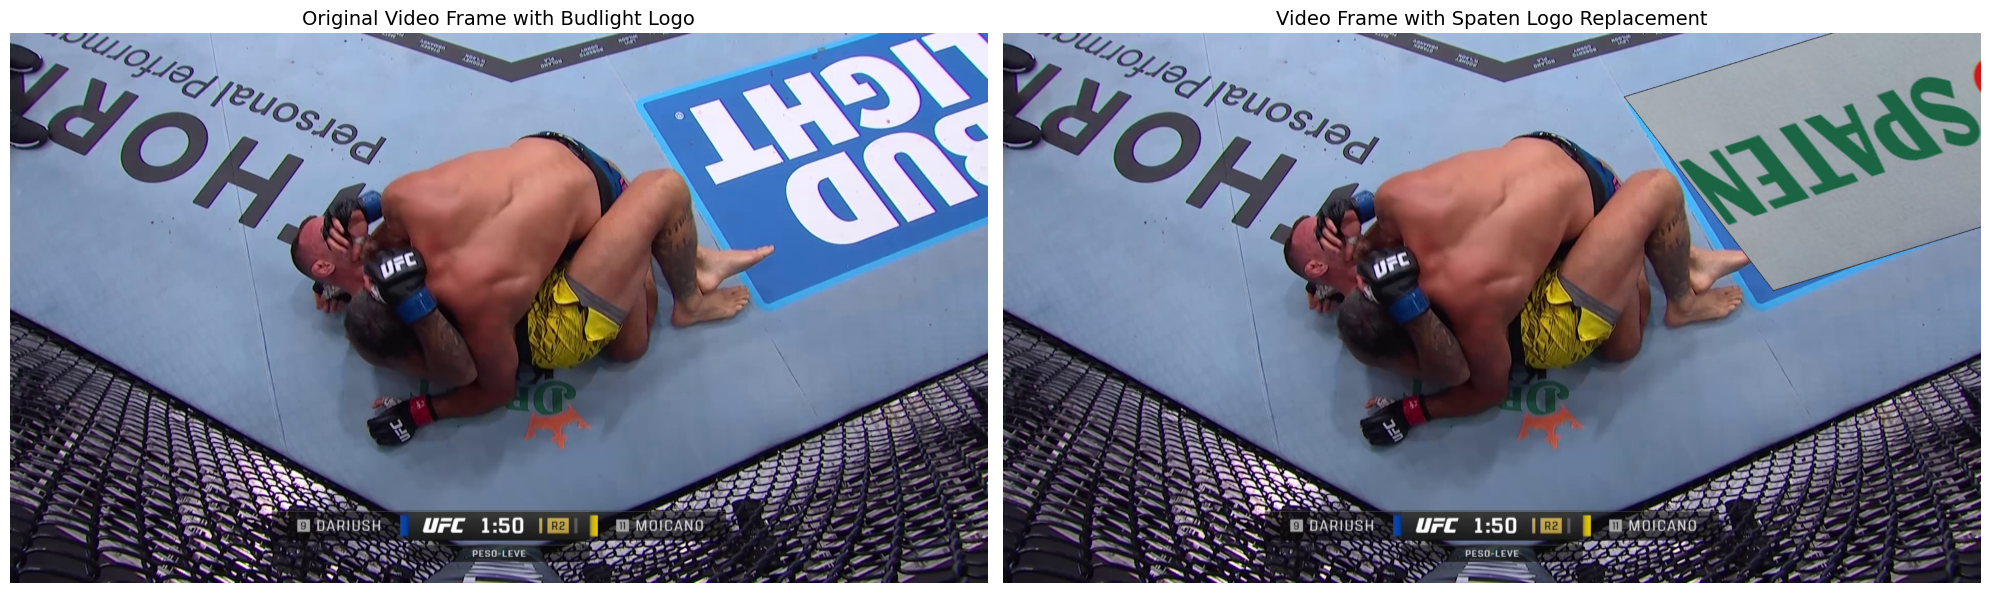

Logo replacement completed successfully!
Replaced logo using homography matrix with 2264 matched points


In [ ]:
# %%

H = match_filtered["H"]
h0, w0, _ = budlight_video_frame_cropped.shape

spaten_warped = cv2.warpPerspective(
    spaten_logo_top_view,
    H,
    (w0, h0),
)

plt.figure(figsize=(10, 10))
plt.imshow(spaten_warped)
plt.show()

# TODO: overlap spaten warped into video_frame0

# Create a mask for the warped Spaten logo (non-zero pixels)
spaten_gray = cv2.cvtColor(spaten_warped, cv2.COLOR_RGB2GRAY)
mask = spaten_gray > 0

# Create 3-channel mask for RGB image
mask_3d = np.stack([mask, mask, mask], axis=-1)

# Replace the logo in the video frame
video_frame_with_spaten = video_frame0.copy()
video_frame_with_spaten[y1:y2, x1:x2][mask_3d] = spaten_warped[mask_3d]

# Display the result
plt.figure(figsize=(20, 10))

# Create subplot for comparison
plt.subplot(1, 2, 1)
plt.imshow(video_frame0)
plt.title("Original Video Frame with Budlight Logo", fontsize=14)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(video_frame_with_spaten)
plt.title("Video Frame with Spaten Logo Replacement", fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

print("Logo replacement completed successfully!")
print(f"Replaced logo using homography matrix with {len(match_filtered['mmkpts0'])} matched points")

# %% [markdown]

 # Swapping with digital logos

Spaten digital logo shape: (2160, 3840, 4)
Budlight digital logo shape: (653, 1154, 3)


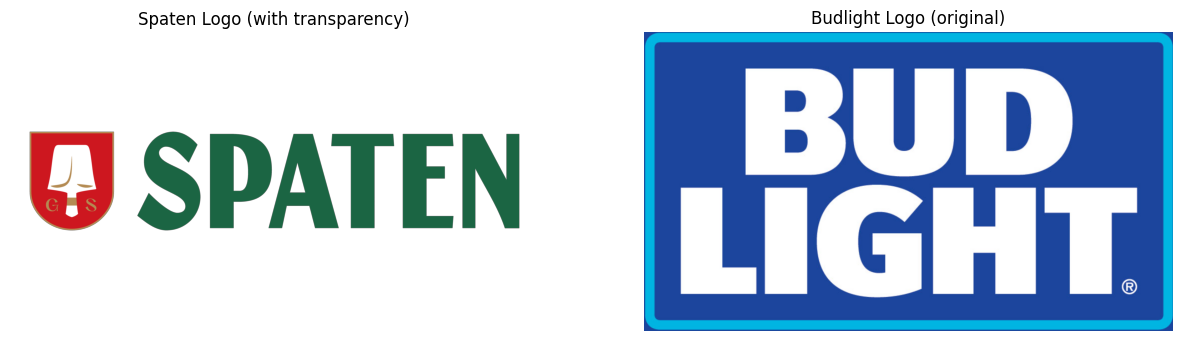

In [ ]:
# %%

spaten_digital_logo_path = "/home/sebastiangarcia/projects/swappr/logo_id_data/digital/spaten_transparent.png"
budlight_digital_logo_path = "/home/sebastiangarcia/projects/swappr/logo_id_data/digital/bud_light.png"

# Load Spaten logo with alpha channel (transparency)
spaten_digital_logo = cv2.imread(spaten_digital_logo_path, cv2.IMREAD_UNCHANGED)
spaten_digital_logo = cv2.cvtColor(spaten_digital_logo, cv2.COLOR_BGRA2RGBA)

# Load Budlight logo (no alpha channel)
budlight_digital_logo = cv2.imread(budlight_digital_logo_path)
budlight_digital_logo = cv2.cvtColor(budlight_digital_logo, cv2.COLOR_BGR2RGB)

print(f"Spaten digital logo shape: {spaten_digital_logo.shape}")
print(f"Budlight digital logo shape: {budlight_digital_logo.shape}")

# Show original logos
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(spaten_digital_logo)
plt.title("Spaten Logo (with transparency)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(budlight_digital_logo)
plt.title("Budlight Logo (original)")
plt.axis('off')
plt.show()

Budlight downsampled shape: (326, 577, 3)


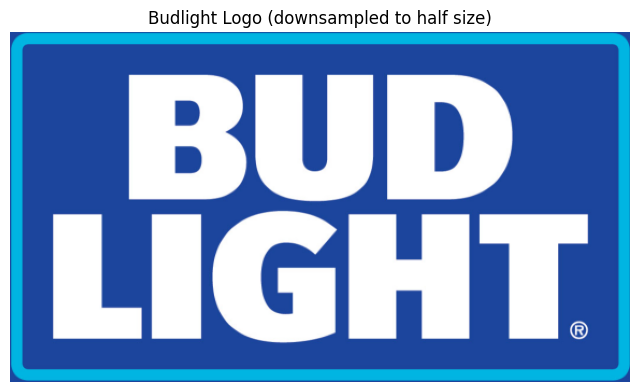

In [ ]:
# %%

# Downsample Budlight logo to half size
budlight_half_height = budlight_digital_logo.shape[0] // 2
budlight_half_width = budlight_digital_logo.shape[1] // 2

budlight_downsampled = cv2.resize(budlight_digital_logo, (budlight_half_width, budlight_half_height), interpolation=cv2.INTER_AREA)

print(f"Budlight downsampled shape: {budlight_downsampled.shape}")

plt.figure(figsize=(8, 5))
plt.imshow(budlight_downsampled)
plt.title("Budlight Logo (downsampled to half size)")
plt.axis('off')
plt.show()

Original Budlight dimensions: 577x326
Original Spaten dimensions: 3840x2160
Target Spaten dimensions: 721x407
Scale factor: 0.1878
Resized Spaten dimensions: 721x405


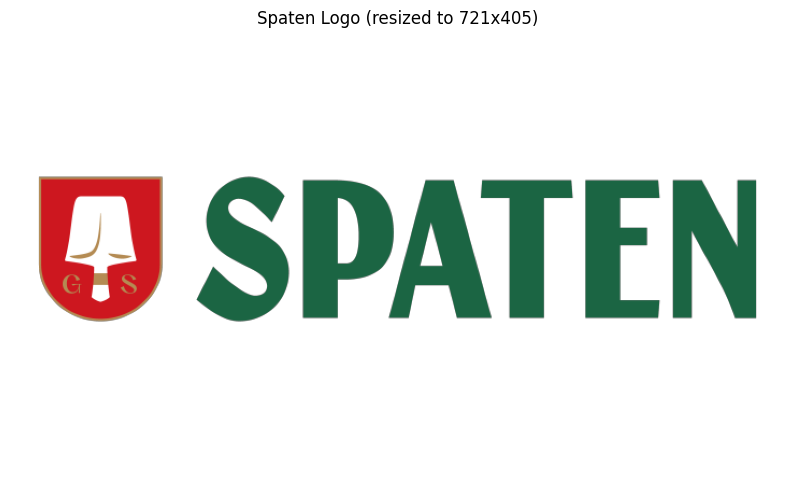

Overlay position: (-72, -40)
Spaten logo will extend beyond Budlight bounds: True


In [ ]:
# %%

def overlay_with_transparency(background: np.ndarray, overlay: np.ndarray, x_offset: int, y_offset: int) -> np.ndarray:
    """
    Overlay an image with transparency (alpha channel) onto a background image.

    Args:
        background: Background image (H, W, 3) RGB
        overlay: Overlay image (H, W, 4) RGBA with alpha channel
        x_offset: X offset for overlay position
        y_offset: Y offset for overlay position

    Returns:
        Combined image with overlay applied
    """
    # Create a copy of the background
    result = background.copy()

    # Get background dimensions
    bg_h, bg_w = background.shape[:2]

    # Get overlay dimensions
    overlay_h, overlay_w = overlay.shape[:2]

    # Calculate the region where overlay will be placed
    # Handle cases where overlay extends beyond background bounds
    start_x = max(0, x_offset)
    start_y = max(0, y_offset)
    end_x = min(bg_w, x_offset + overlay_w)
    end_y = min(bg_h, y_offset + overlay_h)

    # Calculate corresponding region in overlay
    overlay_start_x = max(0, -x_offset)
    overlay_start_y = max(0, -y_offset)
    overlay_end_x = overlay_start_x + (end_x - start_x)
    overlay_end_y = overlay_start_y + (end_y - start_y)

    # Extract the region of interest from both images
    bg_region = result[start_y:end_y, start_x:end_x]
    overlay_region = overlay[overlay_start_y:overlay_end_y, overlay_start_x:overlay_end_x]

    # Check if we have valid regions
    if bg_region.shape[0] == 0 or bg_region.shape[1] == 0:
        return result

    # Extract RGB and alpha channels from overlay
    overlay_rgb = overlay_region[:, :, :3]
    alpha = overlay_region[:, :, 3] / 255.0  # Normalize alpha to [0, 1]

    # Create alpha mask for broadcasting
    alpha_mask = np.stack([alpha, alpha, alpha], axis=-1)

    # Blend the images using alpha compositing
    blended = overlay_rgb * alpha_mask + bg_region * (1 - alpha_mask)

    # Update the result
    result[start_y:end_y, start_x:end_x] = blended.astype(np.uint8)

    return result

# Calculate center position for overlaying Spaten on Budlight
budlight_h, budlight_w = budlight_downsampled.shape[:2]
spaten_h, spaten_w = spaten_digital_logo.shape[:2]

print(f"Original Budlight dimensions: {budlight_w}x{budlight_h}")
print(f"Original Spaten dimensions: {spaten_w}x{spaten_h}")

# Calculate scaling factor to make Spaten fit nicely within Budlight
# Let's make Spaten about 80% of Budlight's size so it fits well but remains prominent
target_scale = 1.25
target_width = int(budlight_w * target_scale)
target_height = int(budlight_h * target_scale)

# Calculate the actual scale factor needed to fit these dimensions
scale_factor_w = target_width / spaten_w
scale_factor_h = target_height / spaten_h
scale_factor = min(scale_factor_w, scale_factor_h)  # Use the smaller scale to maintain aspect ratio

print(f"Target Spaten dimensions: {target_width}x{target_height}")
print(f"Scale factor: {scale_factor:.4f}")

# Resize Spaten logo
spaten_resized_w = int(spaten_w * scale_factor)
spaten_resized_h = int(spaten_h * scale_factor)
spaten_resized = cv2.resize(spaten_digital_logo, (spaten_resized_w, spaten_resized_h), interpolation=cv2.INTER_AREA)

print(f"Resized Spaten dimensions: {spaten_resized_w}x{spaten_resized_h}")

# Show the resized Spaten logo
plt.figure(figsize=(10, 6))
plt.imshow(spaten_resized)
plt.title(f"Spaten Logo (resized to {spaten_resized_w}x{spaten_resized_h})")
plt.axis('off')
plt.show()

# Center the resized Spaten logo on the Budlight logo
center_x = (budlight_w - spaten_resized_w) // 2
center_y = (budlight_h - spaten_resized_h) // 2

print(f"Overlay position: ({center_x}, {center_y})")
print(f"Spaten logo will extend beyond Budlight bounds: {spaten_resized_w > budlight_w or spaten_resized_h > budlight_h}")

# Create the overlay with the resized Spaten logo
overlay_result = overlay_with_transparency(budlight_downsampled, spaten_resized, center_x, center_y)

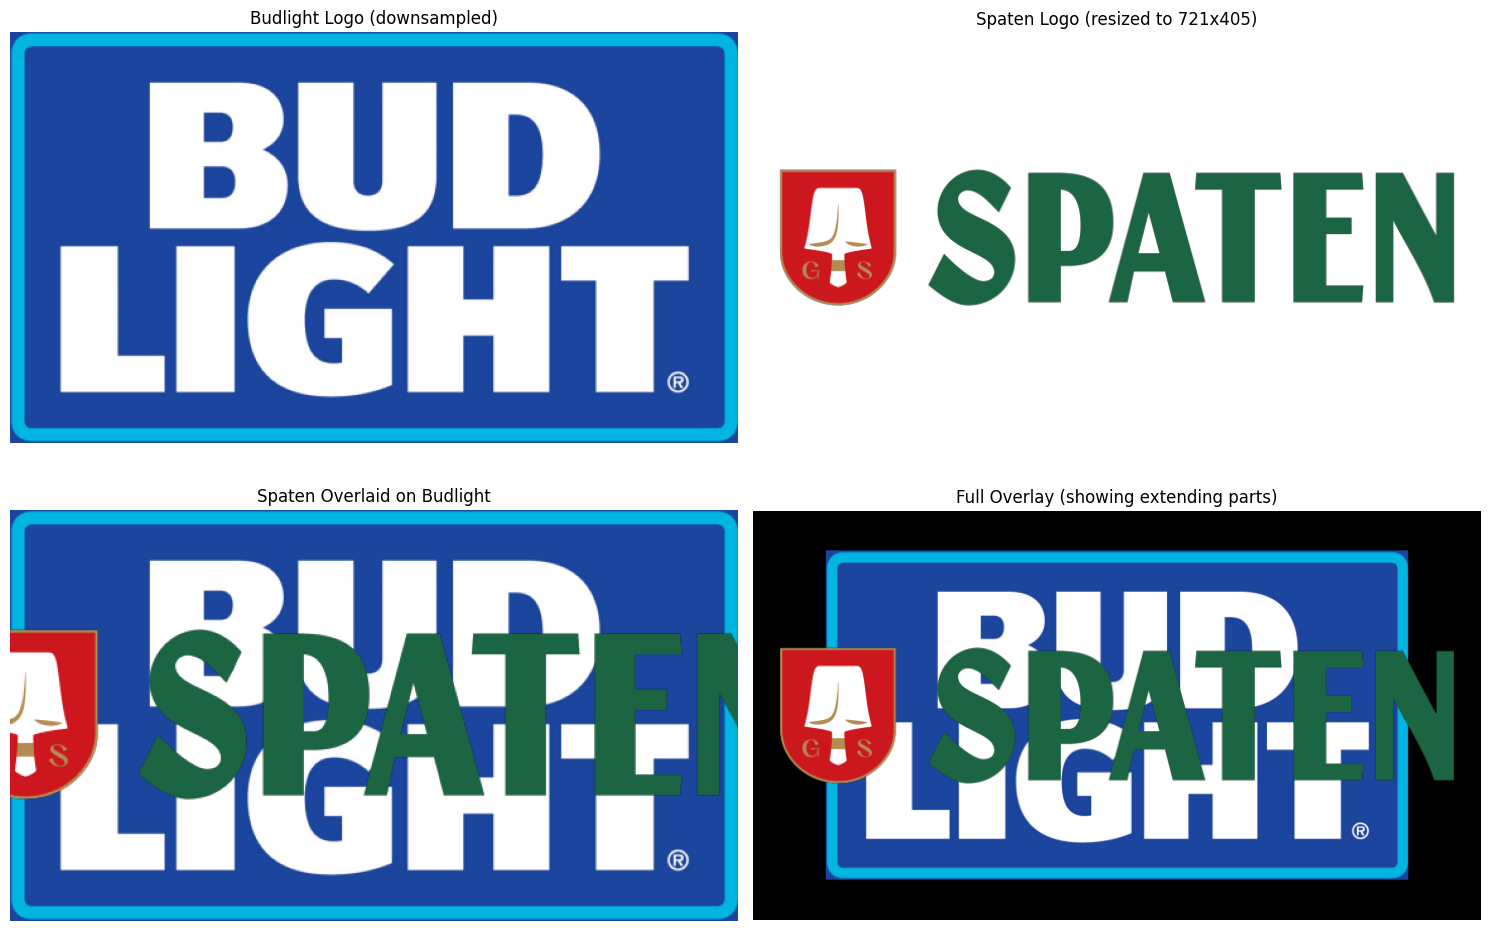

Overlay completed!
Final overlay shape: (326, 577, 3)
Extended overlay shape: (405, 721, 3)
Spaten was resized from 3840x2160 to 721x405
Scale factor applied: 0.1878


In [ ]:
# %%

# Display the final result
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(budlight_downsampled)
plt.title("Budlight Logo (downsampled)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(spaten_resized)
plt.title(f"Spaten Logo (resized to {spaten_resized_w}x{spaten_resized_h})")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(overlay_result)
plt.title("Spaten Overlaid on Budlight")
plt.axis('off')

plt.subplot(2, 2, 4)

# Show a comparison - let's also create a version where we crop to show the full overlay
extended_w = max(budlight_w, spaten_resized_w)
extended_h = max(budlight_h, spaten_resized_h)
extended_background = np.zeros((extended_h, extended_w, 3), dtype=np.uint8)

# Place budlight in the center of extended background
budlight_offset_x = (extended_w - budlight_w) // 2
budlight_offset_y = (extended_h - budlight_h) // 2
extended_background[budlight_offset_y:budlight_offset_y + budlight_h,
                   budlight_offset_x:budlight_offset_x + budlight_w] = budlight_downsampled

# Overlay resized Spaten in the center of extended background
spaten_offset_x = (extended_w - spaten_resized_w) // 2
spaten_offset_y = (extended_h - spaten_resized_h) // 2
extended_overlay = overlay_with_transparency(extended_background, spaten_resized, spaten_offset_x, spaten_offset_y)

plt.imshow(extended_overlay)
plt.title("Full Overlay (showing extending parts)")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Overlay completed!")
print(f"Final overlay shape: {overlay_result.shape}")
print(f"Extended overlay shape: {extended_overlay.shape}")
print(f"Spaten was resized from {spaten_w}x{spaten_h} to {spaten_resized_w}x{spaten_resized_h}")
print(f"Scale factor applied: {scale_factor:.4f}")

# %% [markdown]

 # Logo replacement with digital logos

In [ ]:
#%%

# Save the overlay components for logo replacement pipeline
import pickle
import os

# Create directory for saving overlay components
overlay_dir = "overlay_components"
os.makedirs(overlay_dir, exist_ok=True)

# Save the key components needed for logo replacement
overlay_components = {
    # The exact logos used in the overlay
    "budlight_downsampled": budlight_downsampled,  # This is the reference for matching
    "spaten_resized": spaten_resized,  # This is the logo to be placed

    # Overlay positioning information
    "center_x": center_x,  # Offset to center SPATEN on Budlight
    "center_y": center_y,  # Offset to center SPATEN on Budlight

    # Dimensions for verification
    "budlight_shape": budlight_downsampled.shape,
    "spaten_shape": spaten_resized.shape,

    # The final overlay result
    "overlay_result": overlay_result,

    # Scale information
    "scale_factor": scale_factor,
    "target_scale": target_scale
}

# Save to file
with open(os.path.join(overlay_dir, "overlay_components.pkl"), "wb") as f:
    pickle.dump(overlay_components, f)

# Save individual images as well
cv2.imwrite(os.path.join(overlay_dir, "budlight_downsampled.png"),
            cv2.cvtColor(budlight_downsampled, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(overlay_dir, "spaten_resized.png"),
            cv2.cvtColor(spaten_resized[:,:,:3], cv2.COLOR_RGB2BGR))  # Remove alpha for saving
cv2.imwrite(os.path.join(overlay_dir, "overlay_result.png"),
            cv2.cvtColor(overlay_result, cv2.COLOR_RGB2BGR))

print("Overlay components saved successfully!")
print(f"Budlight reference logo shape: {budlight_downsampled.shape}")
print(f"SPATEN replacement logo shape: {spaten_resized.shape}")
print(f"Overlay offset: ({center_x}, {center_y})")

Overlay components saved successfully!
Budlight reference logo shape: (326, 577, 3)
SPATEN replacement logo shape: (405, 721, 4)
Overlay offset: (-72, -40)


In [ ]:
# %%

def map_budlight_to_spaten_coordinates(budlight_points: np.ndarray,
                                     center_x: int, center_y: int) -> np.ndarray:
    """
    Map coordinates from Budlight logo space to SPATEN logo space.

    This function takes keypoints detected in the Budlight logo and maps them
    to the corresponding coordinates in the SPATEN logo, accounting for the
    overlay offset used when positioning SPATEN on top of Budlight.

    Args:
        budlight_points: Array of shape (N, 2) with (x, y) coordinates in Budlight logo space
        center_x: X offset used to center SPATEN on Budlight
        center_y: Y offset used to center SPATEN on Budlight

    Returns:
        Array of shape (N, 2) with corresponding (x, y) coordinates in SPATEN logo space
    """
    # Convert Budlight coordinates to SPATEN coordinates
    # Since SPATEN was placed at (center_x, center_y) on Budlight,
    # we need to subtract these offsets to get SPATEN-local coordinates
    spaten_points = budlight_points.copy()
    spaten_points[:, 0] -= center_x  # Adjust x coordinates
    spaten_points[:, 1] -= center_y  # Adjust y coordinates

    return spaten_points

def create_logo_replacement_pipeline():
    """
    Create a complete pipeline for replacing Budlight with SPATEN in video frames.

    Returns:
        Dictionary containing all necessary components and functions
    """

    def replace_logo_in_frame(video_frame: np.ndarray,
                            budlight_bbox: np.ndarray,
                            roma_model,
                            preprocessing_conf: dict,
                            expansion_factor: float = 0.1) -> np.ndarray:
        """
        Replace Budlight logo with SPATEN in a video frame.

        Args:
            video_frame: Original video frame with Budlight logo
            budlight_bbox: Bounding box of Budlight logo [x1, y1, x2, y2]
            roma_model: Loaded ROMA model for matching
            preprocessing_conf: Preprocessing configuration
            expansion_factor: Factor to expand bounding box

        Returns:
            Video frame with SPATEN logo replacing Budlight
        """
        # Expand bounding box
        img_height, img_width = video_frame.shape[:2]
        x1, y1, x2, y2 = expand_box(budlight_bbox, expansion_factor, img_width, img_height)

        # Crop the physical logo from video frame
        physical_logo_cropped = video_frame[y1:y2, x1:x2]

        # Step 1: Match physical logo with digital Budlight
        match_pred = run_matching_simple(
            roma_model,
            physical_logo_cropped,
            budlight_downsampled,  # Use the same Budlight logo used in overlay
            preprocessing_conf=preprocessing_conf
        )

        # Step 2: Filter matches with RANSAC
        match_filtered = filter_matches_ransac(match_pred)

        if len(match_filtered['H']) == 0:
            print("Failed to find sufficient matches, returning original frame")
            return video_frame

        # Step 3: Map Budlight keypoints to SPATEN keypoints
        budlight_keypoints = match_filtered['mmkpts1']  # Keypoints in digital Budlight
        spaten_keypoints = map_budlight_to_spaten_coordinates(budlight_keypoints, center_x, center_y)

        # Step 4: Compute homography using physical logo keypoints -> SPATEN keypoints
        physical_keypoints = match_filtered['mmkpts0']  # Keypoints in physical logo

        # Compute homography: physical logo -> SPATEN
        H_spaten, mask = cv2.findHomography(
            spaten_keypoints,  # Source: SPATEN coordinates
            physical_keypoints,  # Target: physical logo coordinates
            cv2.RANSAC,
            ransacReprojThreshold=8.0,
            confidence=0.999,
            maxIters=10000
        )

        if H_spaten is None:
            print("Failed to compute SPATEN homography, returning original frame")
            return video_frame

        # Step 5: Warp SPATEN logo to match physical logo perspective
        crop_h, crop_w = physical_logo_cropped.shape[:2]
        spaten_warped = cv2.warpPerspective(
            spaten_resized[:,:,:3],  # Remove alpha channel for warping
            H_spaten,
            (crop_w, crop_h)
        )

        # Step 6: Create mask and replace logo in video frame
        spaten_gray = cv2.cvtColor(spaten_warped, cv2.COLOR_RGB2GRAY)
        mask = spaten_gray > 0
        mask_3d = np.stack([mask, mask, mask], axis=-1)

        # Replace the logo in the video frame
        result_frame = video_frame.copy()
        result_frame[y1:y2, x1:x2][mask_3d] = spaten_warped[mask_3d]

        return result_frame

    return {
        "budlight_reference": budlight_downsampled,
        "spaten_replacement": spaten_resized,
        "overlay_offset": (center_x, center_y),
        "mapping_function": map_budlight_to_spaten_coordinates,
        "replacement_pipeline": replace_logo_in_frame
    }

# Create the complete pipeline
logo_replacement_pipeline = create_logo_replacement_pipeline()

print("Logo replacement pipeline created successfully!")
print("Components available:")
print("- budlight_reference: Reference logo for matching")
print("- spaten_replacement: SPATEN logo to place in video")
print("- overlay_offset: Positioning offset for coordinate mapping")
print("- mapping_function: Function to map Budlight → SPATEN coordinates")
print("- replacement_pipeline: Complete replacement function")

Logo replacement pipeline created successfully!
Components available:
- budlight_reference: Reference logo for matching
- spaten_replacement: SPATEN logo to place in video
- overlay_offset: Positioning offset for coordinate mapping
- mapping_function: Function to map Budlight → SPATEN coordinates
- replacement_pipeline: Complete replacement function


In [ ]:
# %%

# Test the coordinate mapping function
print("\n=== Testing Coordinate Mapping ===")

# Create some test points in Budlight logo space
test_budlight_points = np.array([
    [100, 50],   # Top-left area
    [288, 163],  # Center (roughly)
    [450, 250],  # Bottom-right area
    [0, 0],      # Top-left corner
    [577, 326]   # Bottom-right corner (max dimensions)
])

# Map to SPATEN coordinates
test_spaten_points = map_budlight_to_spaten_coordinates(test_budlight_points, center_x, center_y)

print("Coordinate mapping test:")
print("Budlight → SPATEN coordinates:")
for i, (bud_pt, spaten_pt) in enumerate(zip(test_budlight_points, test_spaten_points)):
    print(f"  Point {i}: ({bud_pt[0]}, {bud_pt[1]}) → ({spaten_pt[0]}, {spaten_pt[1]})")

print(f"\nOverlay offset used: ({center_x}, {center_y})")
print(f"SPATEN logo bounds: 0 to {spaten_resized.shape[1]}x{spaten_resized.shape[0]}")


=== Testing Coordinate Mapping ===
Coordinate mapping test:
Budlight → SPATEN coordinates:
  Point 0: (100, 50) → (172, 90)
  Point 1: (288, 163) → (360, 203)
  Point 2: (450, 250) → (522, 290)
  Point 3: (0, 0) → (72, 40)
  Point 4: (577, 326) → (649, 366)

Overlay offset used: (-72, -40)
SPATEN logo bounds: 0 to 721x405



=== Testing Complete Logo Replacement Pipeline ===

0: 384x640 1 logo_budlight, 9.8ms
Speed: 20.6ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Video frame shape: (1080, 1920, 3)
Budlight bbox: [1233    0 1918  539]
Running logo replacement pipeline...


[2025/07/10 17:21:46 hloc INFO] ransac_method: CV2_USAC_MAGSAC, geometry_type: Homography


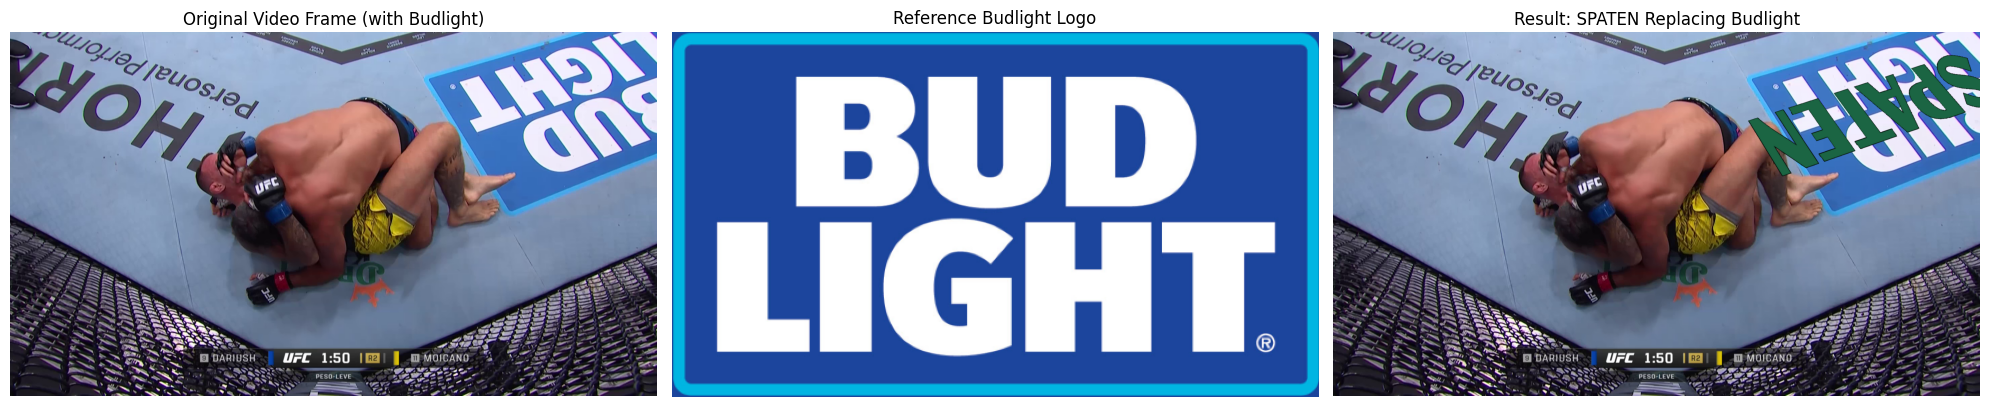

Logo replacement pipeline test completed!
✅ Physical Budlight logo successfully replaced with SPATEN logo


In [ ]:
# %%

# Demonstrate the complete logo replacement pipeline
print("\n=== Testing Complete Logo Replacement Pipeline ===")

# Load the video frame and detect Budlight logo (reusing existing data)
video_frame_test = cv2.imread(video_frame0_path)
# Get Budlight bounding box (reusing existing detection)
results = det_model_budlight(video_frame_test)

video_frame_test = cv2.cvtColor(video_frame_test, cv2.COLOR_BGR2RGB)
budlight_bbox = results[0].boxes.xyxy.cpu().numpy().astype("int").squeeze()

print(f"Video frame shape: {video_frame_test.shape}")
print(f"Budlight bbox: {budlight_bbox}")

# Apply the complete replacement pipeline
print("Running logo replacement pipeline...")
result_frame = logo_replacement_pipeline["replacement_pipeline"](
    video_frame_test,
    budlight_bbox,
    roma_model,
    roma_preprocessing_conf,
    expansion_factor=0.1
)

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(video_frame_test)
plt.title("Original Video Frame (with Budlight)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(logo_replacement_pipeline["budlight_reference"])
plt.title("Reference Budlight Logo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_frame)
plt.title("Result: SPATEN Replacing Budlight")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Logo replacement pipeline test completed!")
print("✅ Physical Budlight logo successfully replaced with SPATEN logo")

In [ ]:
# %%

# Summary of the complete solution
print("\n" + "="*60)
print("COMPLETE LOGO REPLACEMENT SOLUTION SUMMARY")
print("="*60)

print("\n📁 SAVED COMPONENTS:")
print(f"   • Budlight reference logo: {budlight_downsampled.shape}")
print(f"   • SPATEN replacement logo: {spaten_resized.shape}")
print(f"   • Overlay offset: ({center_x}, {center_y})")
print(f"   • All files saved to: ./overlay_components/")

print("\n🔧 KEY FUNCTIONS:")
print("   • map_budlight_to_spaten_coordinates(): Maps Budlight → SPATEN coordinates")
print("   • replace_logo_in_frame(): Complete replacement pipeline")

print("\n🎯 WORKFLOW:")
print("   1. YOLO detects Budlight logo in video frame")
print("   2. ROMA matches physical ↔ digital Budlight logo")
print("   3. Coordinate mapping translates Budlight → SPATEN points")
print("   4. Homography computed using physical ↔ SPATEN correspondences")
print("   5. SPATEN logo warped to match physical perspective")
print("   6. Logo replaced in video frame")

print("\n✨ RESULT:")
print("   Virtual SPATEN logo appears in place of physical Budlight logo!")
print("   The approach uses Budlight as intermediary for robust matching.")

print("\n" + "="*60)


COMPLETE LOGO REPLACEMENT SOLUTION SUMMARY

📁 SAVED COMPONENTS:
   • Budlight reference logo: (326, 577, 3)
   • SPATEN replacement logo: (405, 721, 4)
   • Overlay offset: (-72, -40)
   • All files saved to: ./overlay_components/

🔧 KEY FUNCTIONS:
   • map_budlight_to_spaten_coordinates(): Maps Budlight → SPATEN coordinates
   • replace_logo_in_frame(): Complete replacement pipeline

🎯 WORKFLOW:
   1. YOLO detects Budlight logo in video frame
   2. ROMA matches physical ↔ digital Budlight logo
   3. Coordinate mapping translates Budlight → SPATEN points
   4. Homography computed using physical ↔ SPATEN correspondences
   5. SPATEN logo warped to match physical perspective
   6. Logo replaced in video frame

✨ RESULT:
   Virtual SPATEN logo appears in place of physical Budlight logo!
   The approach uses Budlight as intermediary for robust matching.



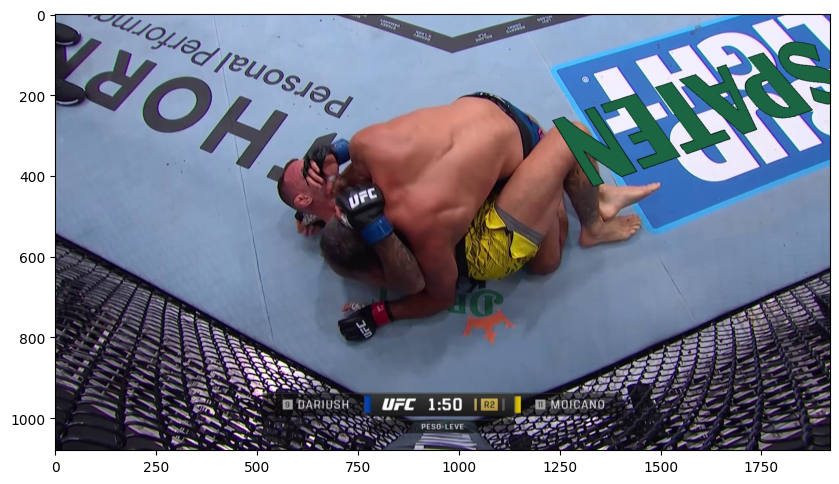

In [ ]:
# %%

plt.figure(figsize=(10, 10))
plt.imshow(result_frame)
plt.show()